In [6]:
import math
import pandas as pd
from langdetect import detect
import numpy as np
import nltk
from nltk.stem import WordNetLemmatizer
import string
from sklearn.feature_extraction.text import CountVectorizer
import math
import matplotlib.pyplot as plt

In [133]:
df = pd.read_csv('/Users/shirinharandi/Downloads/MAIN.csv')

In [134]:
df

,word,old_frequency,new_frequency,old_sum_count,new_sum_count,city,Ofrequency,Nfrequency,freq,gain,licia_gain,cat
0,sympathy,0.693147,0.000000,28749.413958,2.849399e+05,santiago,0.000024,0.000000,0.000012,0.000000,0.000000,social
1,sympathy,0.693147,0.693147,152972.974940,5.842802e+05,buenos_aires,0.000005,0.000001,0.000003,0.261814,1.000000,social
2,generosity,0.693147,4.158883,29943.177707,7.425888e+05,taipei,0.000023,0.000006,0.000014,0.241936,6.000000,business
3,generosity,0.693147,2.772589,18882.041536,4.234295e+05,singapore,0.000037,0.000007,0.000022,0.178372,4.000000,business
4,generosity,1.386294,12.476649,53601.102349,1.137558e+06,mexico_city,0.000026,0.000011,0.000018,0.424075,9.000000,business
...,...,...,...,...,...,...,...,...,...,...,...,...
315,walkable,1.386294,142.330738,18882.041536,4.234295e+05,singapore,0.000073,0.000336,0.000205,4.578372,102.669925,business
316,walkable,3.465736,168.840230,80611.444300,7.503074e+05,hong_kong,0.000043,0.000225,0.000134,5.234051,48.716993,business
317,walkable,3.465736,561.397100,53601.102349,1.137558e+06,mexico_city,0.000065,0.000494,0.000279,7.632643,161.984963,business
318,walkable,15.654703,163.295053,152972.974940,5.842802e+05,buenos_aires,0.000102,0.000279,0.000191,2.731000,10.431054,business


In [135]:
df = df[df['gain'] < 8 ]

In [136]:
def get_log(fu):
    if fu < 2:
        return fu
    return (math.log(fu, 2))
df['gain'] = df['gain'].apply(lambda x: get_log(x))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


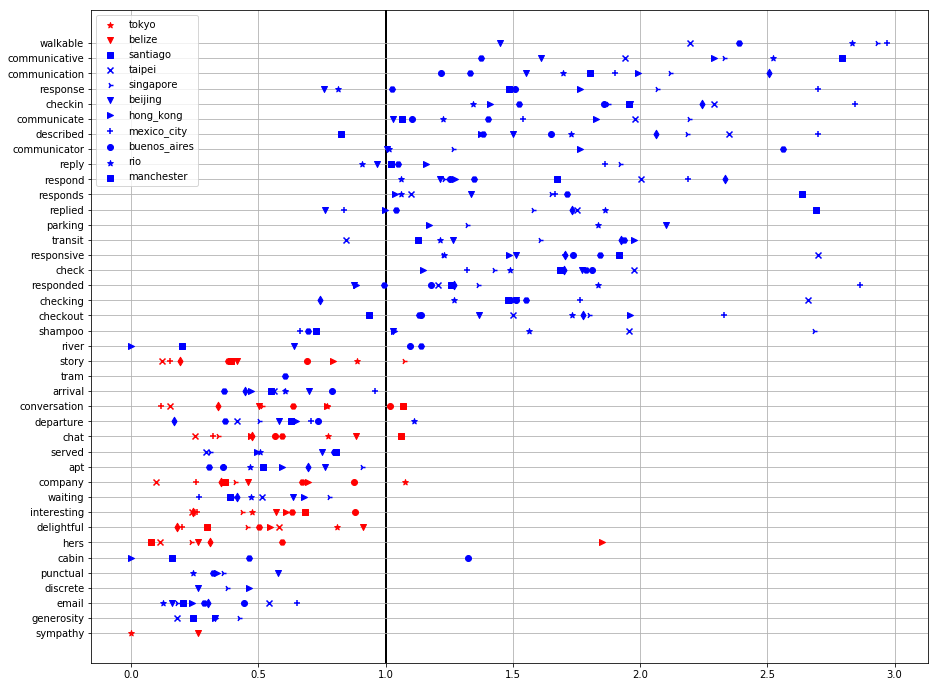

In [190]:
cities = ["tokyo", "belize", "santiago", "taipei", "singapore", "beijing", "hong_kong", "mexico_city", "buenos_aires", "rio", "manchester"]
plt.figure(figsize=(15,12))

# plt.gca().set_xticks(np.arange(0,14,1),minor=True)
# plt.grid(True, which = 'both', zorder = 0)
# plt.rc('axes', axisbelow=True)
# plt.grid()
# plt.set_axisbelow(True)

markers = ["+","o", "*", "s", "x", "d", "H", "4", "v", ">", "v"]
colours = ["blue", "red"]

for w in df.word.unique() :
    j = 0
    tf = df[df['word'] == w]
    if tf.cat.unique()[0] == "social":
        j = 1
    for cit  in tf.city.unique():
        sf = tf[tf['city'] == cit]
        plt.scatter(sf['gain'], sf['word'], c = colours[j], marker = markers[cities.index(cit)]);

plt.legend(cities)
ax = plt.axes()
ax.grid()
ax.set_axisbelow(True)
a = ax.get_xgridlines()
b = a[3]
b.set_color('black')
b.set_linewidth(2)

plt.show()
# plt.figure()